In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2, stride=1))

In [3]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))

In [4]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [11]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [10]:
!pip install pydot

In [9]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\Byeongryul\\AppData\\Local\\Temp\\pip-uninstall-bzm3ccep\\pip.exe'
Consider using the `--user` option or check the permissions.



In [12]:
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', restore_best_weights=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.5029 - accuracy: 0.8215 - val_loss: 0.3203 - val_accuracy: 0.8817
Epoch 2/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3371 - accuracy: 0.8796 - val_loss: 0.2730 - val_accuracy: 0.8985
Epoch 3/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2885 - accuracy: 0.8965 - val_loss: 0.2663 - val_accuracy: 0.9031
Epoch 4/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2554 - accuracy: 0.9063 - val_loss: 0.2425 - val_accuracy: 0.9109
Epoch 5/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2348 - accuracy: 0.9140 - val_loss: 0.2228 - val_accuracy: 0.9171
Epoch 6/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2117 - accuracy: 0.9212 - val_loss: 0.2261 - val_accuracy: 0.9158
Epoch 7/20
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1962 - accuracy: 0.9268 - val_loss: 0.2202 -

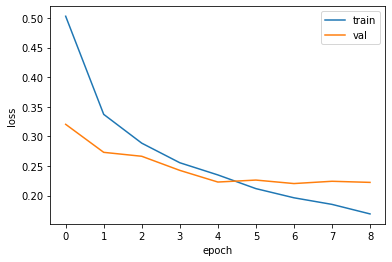

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 9ms/step - loss: 0.2202 - accuracy: 0.9204


[0.2202383577823639, 0.9204166531562805]

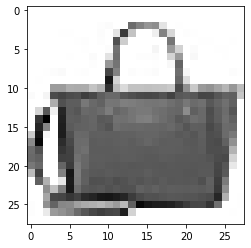

In [16]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [19]:
preds = model.predict(val_scaled[0:1])

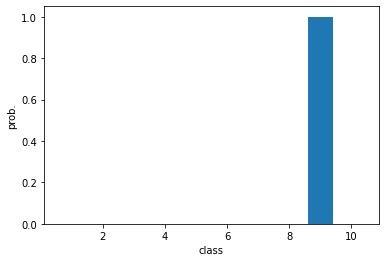

In [20]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [21]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [23]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.2387 - accuracy: 0.9141


[0.23872512578964233, 0.9140999913215637]

In [26]:

import tensorflow as tf
x = tf.constant([[1., 2., 3., ],
                 [5., 6., 7., ],
                 [9., 10., 11.,]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(2, 2), padding='same')
max_pool_2d(x)




<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[ 6.],
         [ 7.]],

        [[10.],
         [11.]]]], dtype=float32)>